In [1]:
library(depmixS4)
library(astsa)
y = ts(sp500w, start=2003, freq=52) # make data depmix friendly
mod2 <- depmix(y~1, nstates=2, data=data.frame(y))
set.seed(2)
summary(fm2 <- fit(mod2))


Loading required package: nnet

Loading required package: MASS

Loading required package: Rsolnp

Loading required package: nlme



converged at iteration 32 with logLik: 1228.603 
Initial state probabilities model 
pr1 pr2 
  1   0 

Transition matrix 
        toS1  toS2
fromS1 0.947 0.053
fromS2 0.015 0.985

Response parameters 
Resp 1 : gaussian 
    Re1.(Intercept) Re1.sd
St1          -0.004  0.044
St2           0.003  0.016


Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”
Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”


0.95,0.05
0.02,0.98


-0.004,0.003
0.044,0.016


Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”


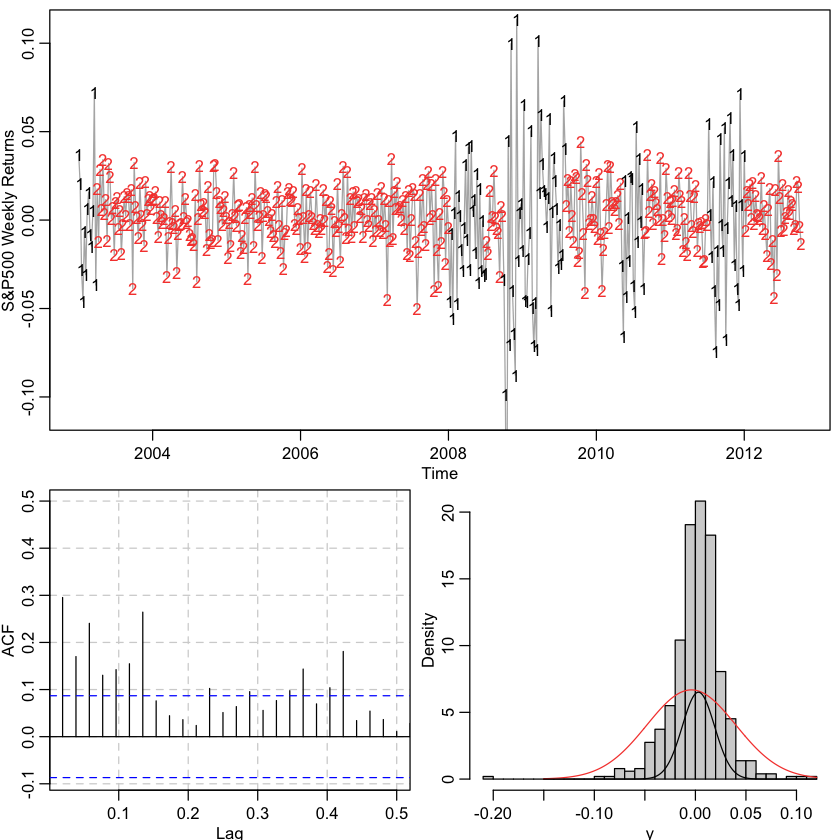

In [2]:
##-- Graphics --##
layout(matrix(c(1,2, 1,3), 2), heights=c(1,.75))
par(mar=c(2.5,2.5,.5,.5), mgp=c(1.6,.6,0))
plot(y, main="", ylab='S&P500 Weekly Returns', col=gray(.7),
ylim=c(-.11,.11))
culer = posterior(fm2)[,1]; 
text(y, col=culer, labels=posterior(fm2)[,1])
##-- MLEs --##
para.mle = as.vector(getpars(fm2)[-(1:2)])
(mtrans.mle = round(t(matrix(para.mle[1:4],2,2)),2))
(norms.mle = round(matrix(para.mle[5:8],2,2),3))
acf(y^2, xlim=c(.02,.5), ylim=c(-.09,.5), panel.first=grid(lty=2) )
hist(y, 25, prob=TRUE, main='')
culer=c(2,1); pi.hat = colSums(posterior(fm2)[-1,2:3])/length(y)
for (i in 1:2) { mu=norms.mle[1,i]; sig = norms.mle[2,i]
x = seq(-.15,.12, by=.001)
lines(x, pi.hat[3-i]*dnorm(x, mean=mu, sd=sig), col=culer[i])}

In [3]:
##-- Bootstrap --##
set.seed(666); n.obs = length(y); n.boot = 100
para.star = matrix(NA, nrow=n.boot, ncol = 8)
respst <- para.mle[5:8]; trst <- para.mle[1:4]
for ( nb in 1:n.boot ){
mod <- simulate(mod2)
y.star = as.vector(mod@response[[1]][[1]]@y)
dfy = data.frame(y.star)
mod.star <- depmix(y.star~1, data=dfy, respst=respst, trst=trst, nst=2)
fm.star = fit(mod.star, emcontrol=em.control(tol = 1e-5), verbose=FALSE)
para.star[nb,] = as.vector(getpars(fm.star)[-(1:2)]) }
# bootstrap stnd errors
SE = sqrt(apply(para.star,2,var) + (apply(para.star,2,mean)-para.mle)^2)
(SE.mtrans.mle = round(t(matrix(SE[1:4],2,2)),3))
(SE.norms.mle = round(matrix(SE[5:8], 2,2),3))

converged at iteration 25 with logLik: -720.9108 
converged at iteration 30 with logLik: -710.0801 
converged at iteration 1 with logLik: -721.1284 
converged at iteration 22 with logLik: -727.8863 
converged at iteration 24 with logLik: -736.0984 
converged at iteration 3 with logLik: -715.6458 
converged at iteration 48 with logLik: -705.35 
converged at iteration 23 with logLik: -708.5242 
converged at iteration 11 with logLik: -725.1574 
converged at iteration 8 with logLik: -723.6525 
converged at iteration 1 with logLik: -738.9704 
converged at iteration 40 with logLik: -724.3801 
converged at iteration 20 with logLik: -709.6618 
converged at iteration 17 with logLik: -707.933 
converged at iteration 6 with logLik: -716.78 
converged at iteration 19 with logLik: -714.9939 
converged at iteration 13 with logLik: -728.0144 
converged at iteration 44 with logLik: -712.9359 
converged at iteration 34 with logLik: -726.437 
converged at iteration 3 with logLik: -731.303 
converged at 

0.085,0.085
0.030,0.030


0.279,0.093
0.947,0.970


In [4]:
#problem 3


In [5]:
#EM, adapted from example 6.8
y=log(varve)
library(nlme)
# Initial Estimates 
u = ts.intersect(y, lag(y,-1), lag(y,-2))
varu = var(u); coru = cor(u)
phi = coru[1,3]/coru[1,2]
q = (1-phi^2)*varu[1,2]/phi
r = varu[1,1] - q/(1-phi^2)
# EM procedure
em = EM0(length(y), y, A=1, mu0=y[1], Sigma0=0, Phi=phi, cQ=sqrt(q), cR=sqrt(r),
max.iter=75, tol=.00001)
#print estimates
(estimate=c(phi = em$Phi, sigw2 = em$Q, sigv2 = em$R, mu0 = em$mu0, Sigma0 = em$Sigma0))


iteration    -loglikelihood 
    1          666.5006 
    2          -118.9087 
    3          -121.9102 
    4          -124.078 
    5          -125.9102 
    6          -127.5253 
    7          -128.9626 
    8          -130.2449 
    9          -131.3906 
    10          -132.4156 
    11          -133.3342 
    12          -134.1585 
    13          -134.8993 
    14          -135.5661 
    15          -136.167 
    16          -136.7095 
    17          -137.1997 
    18          -137.6433 
    19          -138.0452 
    20          -138.4098 
    21          -138.7409 
    22          -139.042 
    23          -139.3159 
    24          -139.5655 
    25          -139.7932 
    26          -140.0009 
    27          -140.1907 
    28          -140.3643 
    29          -140.5232 
    30          -140.6687 
    31          -140.802 
    32          -140.9243 
    33          -141.0366 
    34          -141.1397 
    35          -141.2345 
    36          -141.3217 
    37       

phi      sigw2      sigv2        mu0     Sigma0 
0.99902861 0.01357979 0.17933474 3.26880819 0.00000000

In [6]:
#Newton-Raphson adapted from example 6.6

# Initial Estimates
u = ts.intersect(y, lag(y,-1), lag(y,-2))
varu = var(u); coru = cor(u)
phi = coru[1,3]/coru[1,2]
q = (1-phi^2)*varu[1,2]/phi
r = varu[1,1] - q/(1-phi^2)
init.par = c(phi, sqrt(q), sqrt(r),y[1])
# Function to evaluate the likelihood
Linn = function(para){
phi = para[1]; sigw = para[2]; sigv = para[3]; mu0=para[4];
Sigma0 = 0;
kf = Kfilter0(length(y), y, 1, mu0, Sigma0, phi, sigw, sigv)
return(kf$like) }
# Estimation 
est = optim(init.par, Linn, gr=NULL, method='BFGS', hessian=TRUE,
control=list(trace=1, REPORT=1))
(estimate=c(phi=est$par[1],sigw2=est$par[2]^2,sigv2=est$par[3]^2,mu0=est$par[4]))

initial  value 666.500580 
iter   2 value -102.367502
iter   3 value -103.134856
iter   4 value -103.372942
iter   5 value -106.104286
iter   6 value -113.142790
iter   7 value -134.099613
iter   8 value -134.951166
iter   9 value -142.037373
iter  10 value -142.067796
iter  11 value -142.082657
iter  12 value -142.342735
iter  13 value -142.415092
iter  14 value -142.575725
iter  15 value -142.686186
iter  16 value -142.688164
iter  17 value -142.688181
iter  17 value -142.688181
iter  17 value -142.688181
final  value -142.688181 
converged


phi      sigw2      sigv2        mu0 
0.99900298 0.01214315 0.18154395 3.44713732

In [7]:
#here we use Newton-Raphson results
phi=est$par[1]; sigw2=est$par[2]^2; sigv2=est$par[3]^2; mu0=est$par[4]
n<-length(y)
ks<-Ksmooth0(n,y,A=1,mu0=mu0,Sigma0=0,Phi=phi,cQ=sigw2,cR=sigv2)
kp<-Kfilter0(n,y,A=1,mu0=mu0,Sigma0=0,Phi=phi,cQ=sigw2,cR=sigv2)



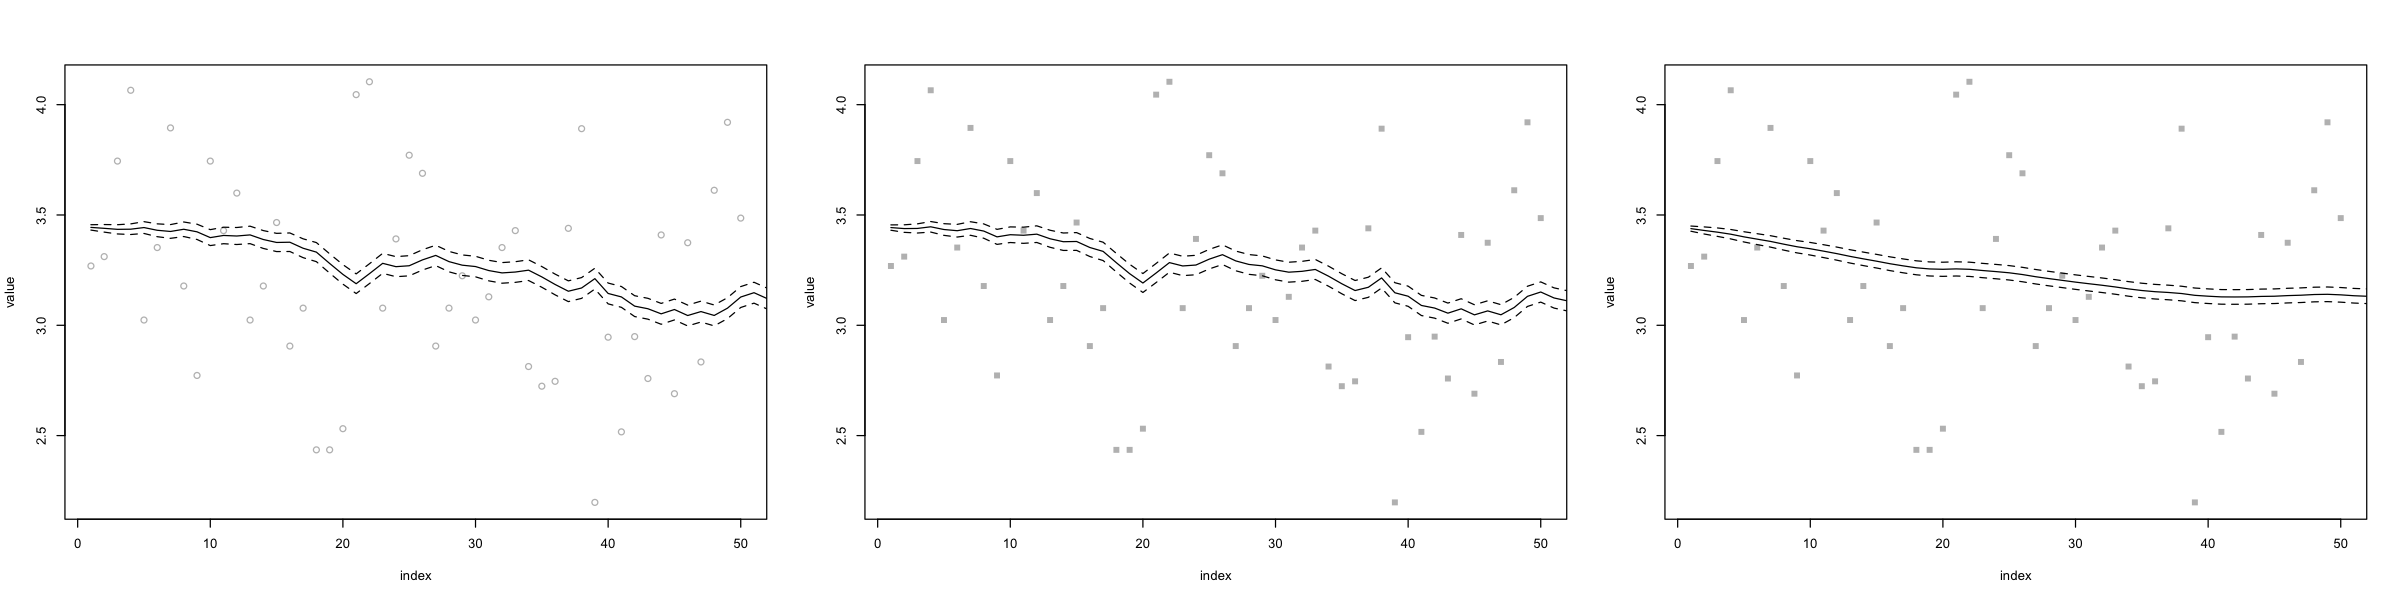

In [8]:
par(mfrow=c(1,3))
options(repr.plot.width=20, repr.plot.height=5)
plot(y[1:50],col='grey',xlab='index',ylab='value')
  lines(kp$xp,lty=1,col='black')
  lines(kp$xp+sqrt(kp$Pp),lty=2,col='black')
  lines(kp$xp-sqrt(kp$Pp),lty=2,col='black')
plot(y[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(kp$xf,lty=1,col='black')
  lines(kp$xf+sqrt(kp$Pf),lty=2,col='black')
  lines(kp$xf-sqrt(kp$Pf),lty=2,col='black')
plot(y[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(ks$xs,lty=1,col='black')
  lines(ks$xs+sqrt(ks$Ps),lty=2,col='black')
  lines(ks$xs-sqrt(ks$Ps),lty=2,col='black')
